In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [3]:
Insurence_Dataset=pd.read_csv('/content/medical_insurance.csv')

In [5]:
Insurence_Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
Insurence_Dataset.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [8]:
# number of rows and coloumn

Insurence_Dataset.shape

(2772, 7)

In [9]:
Insurence_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [10]:
# total 3 categorical columns

# checking for issing values

Insurence_Dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# data analysis

In [13]:
Insurence_Dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-21-ed9dabaf31d3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurence_Dataset['age'])


Text(0.5, 1.0, 'Age distribution')

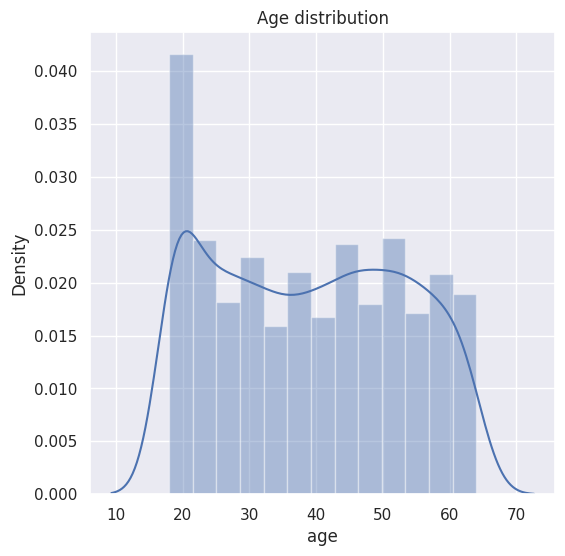

In [21]:
# distribution of age

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Insurence_Dataset['age'])
plt.title('Age distribution')



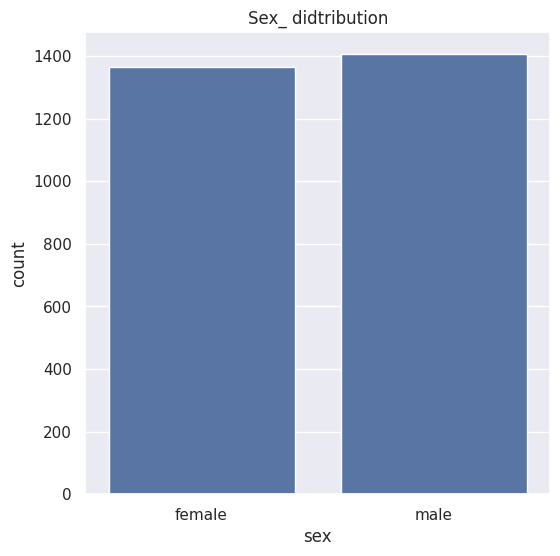

In [22]:
# Gender coloumn
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=Insurence_Dataset)
plt.title('Sex_ didtribution')
plt.show()

In [23]:
Insurence_Dataset['sex'].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

<ipython-input-25-75dfc804cdb9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurence_Dataset['bmi'])


Text(0.5, 1.0, 'bmi distribution')

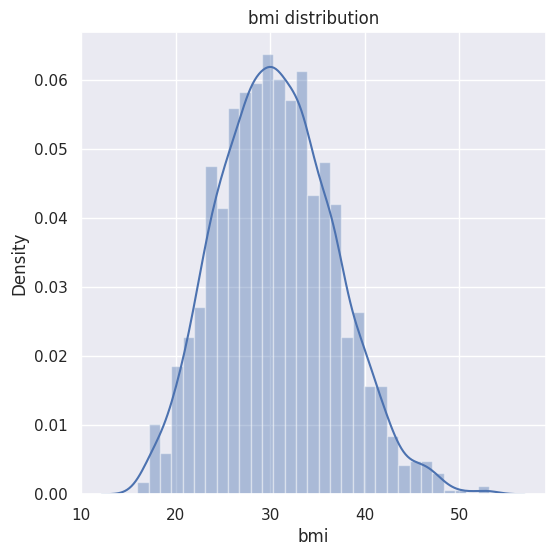

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(Insurence_Dataset['bmi'])
plt.title('bmi distribution')

In [26]:
# NOrmal bmi range is 18.5-24.9

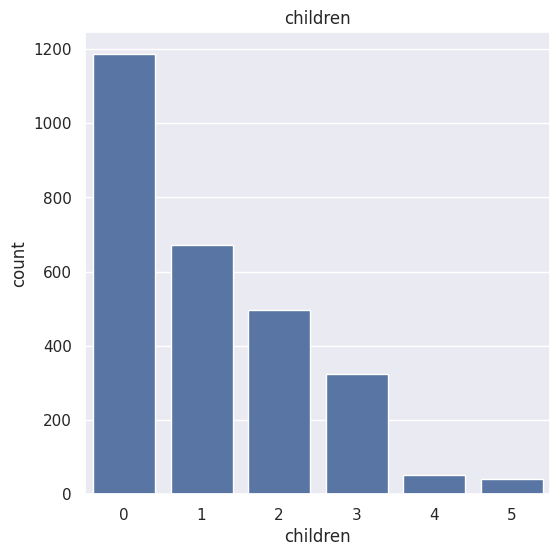

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=Insurence_Dataset)
plt.title('children')
plt.show()


In [4]:
Insurence_Dataset['children'].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

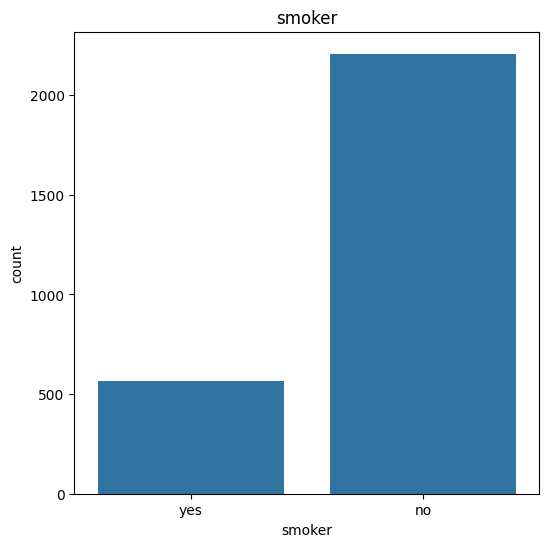

In [5]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=Insurence_Dataset)
plt.title('smoker')
plt.show()


In [6]:
Insurence_Dataset['smoker'].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

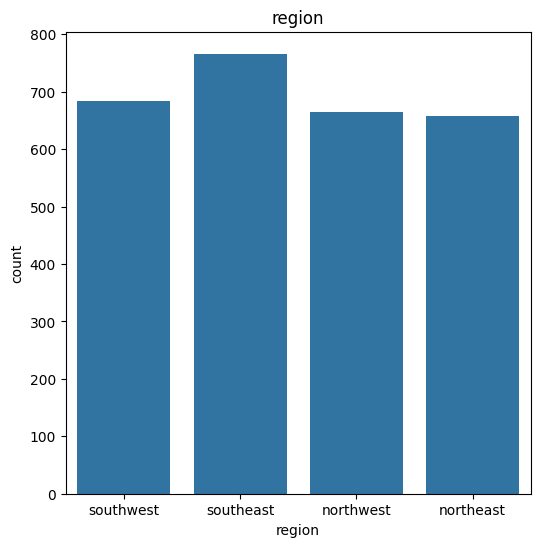

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=Insurence_Dataset)
plt.title('region')
plt.show()

In [8]:
Insurence_Dataset['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

<ipython-input-9-82ac6688c024>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurence_Dataset['charges'])


Text(0.5, 1.0, 'charge distribution')

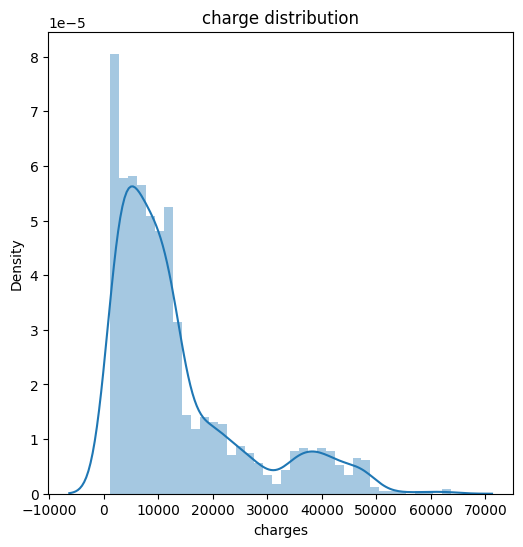

In [9]:
plt.figure(figsize=(6,6))
sns.distplot(Insurence_Dataset['charges'])
plt.title('charge distribution')

In [10]:
# encoding categorical feature
#1) sex
Insurence_Dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

In [12]:
Insurence_Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [14]:
Insurence_Dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
Insurence_Dataset.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

In [17]:
Insurence_Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [18]:
Insurence_Dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
Insurence_Dataset.replace({'region':{'southwest':0, 'southeast':1,'northwest':2,'northeast':3}}, inplace=True)

In [21]:
Insurence_Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [22]:
Insurence_Dataset.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,1,45.320,1,0,1,8569.86180
2768,21,1,34.600,0,0,0,2020.17700
2769,19,0,26.030,1,1,2,16450.89470
2770,23,0,18.715,0,0,2,21595.38229
2771,54,0,31.600,0,0,0,9850.43200


In [23]:
# splitting data into test and train dataset

In [24]:
X=Insurence_Dataset.drop(columns='charges',axis=1) # removing charges from dataset and storig in X variable
Y=Insurence_Dataset['charges']

In [25]:
Insurence_Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [26]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       0       1
2768   21    1  34.600         0       0       0
2769   19    0  26.030         1       1       2
2770   23    0  18.715         0       0       2
2771   54    0  31.600         0       0       0

[2772 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [27]:
x_train ,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,x_train.shape,x_test.shape)

(2772, 6) (2217, 6) (555, 6)


In [29]:
# model traiing
regression=LinearRegression()

In [30]:
regression.fit(x_train,y_train)

LinearRegression()

In [31]:
# model eveluation
# prediction of training data

training_data_prediction=regression.predict(x_train)

In [32]:
# Rsqure value
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R2 value :',r2_train)

R2 value : 0.7560196285212692


In [33]:
testing_data_prediction=regression.predict(x_test)
r2_test=metrics.r2_score(y_test,testing_data_prediction)
print('R2 value :',r2_test)

R2 value : 0.7291350811078193


In [37]:
# Build  predictive system

input_data=(18,0,33.77,1,1,1)

# changing i/p data into numpy arry

ip_data_as_numpy_array=np.asarray(input_data)

# reshape the array
ip_data_reshape=ip_data_as_numpy_array.reshape(1,-1)

prediction=regression.predict(ip_data_reshape)
print(prediction)


[27209.94483563]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(18, 0, 33.77, 1, 1, 1)
